# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset, titled "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State," supports the publication by Lee, Matthews, et al. (bioRxiv 2025.02.03.636224; doi: [10.1101/2025.02.03.636224](https://doi.org/10.1101/2025.02.03.636224)).

The dataset includes:
* In vivo calcium imaging data with supporting behavioral videos.
* Ex vivo patch-clamp electrophysiology recordings.

You can find more information and access the Dandiset at its DANDI Archive page:
[DANDI:001195/0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733)

This notebook will cover:
1. How to load basic information about the Dandiset using the DANDI API.
2. How to select and load an NWB (Neurodata Without Borders) file from this Dandiset.
3. How to access and visualize intracellular electrophysiology data (current clamp recordings) from an NWB file.

## Required Packages

To run this notebook, you'll need the following Python packages. We assume these are already installed in your environment.

* `dandi` (for interacting with the DANDI Archive)
* `pynwb` (for working with NWB files)
* `h5py` (dependency for NWB/remfile)
* `remfile` (for streaming remote HDF5 files)
* `matplotlib` (for plotting)
* `numpy` (for numerical operations)
* `seaborn` (for enhanced plotting styles)

No `pip install` commands are included in this notebook.

## 1. Loading Dandiset Information with the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001195"
version_id = "0.250408.1733"
dandiset = client.get_dandiset(dandiset_id, version_id)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'No description provided.')[:200]}...") # First 200 chars

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733
Dandiset description: Supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Christopher R. Lee, Gillian A. Matthews, Mackenzie E. Lemieux, Elizabet...

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19)


## 2. Loading an NWB File

We will now load one specific NWB file from the Dandiset. For this example, we'll use:

* Path: `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`
* Asset ID: `a243dde4-c270-42a9-8550-025f5ffcd5a7`

The direct download URL for this asset is:
`https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/`

We'll use `pynwb`, `h5py`, and `remfile` to load and stream this remote NWB file.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL for the specific NWB file
nwb_asset_id = "a243dde4-c270-42a9-8550-025f5ffcd5a7"
nwb_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
print(f"Loading NWB file from: {nwb_url}")

# Load the NWB file
# Use remfile.File to open the remote HDF5 file for streaming
remote_f = remfile.File(nwb_url)
# Use h5py.File to interact with the HDF5 structure
h5_f = h5py.File(remote_f, 'r')
# Use pynwb.NWBHDF5IO to read the NWB content
io = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True)
nwbfile = io.read()

print(f"\nSuccessfully loaded NWB file: {nwbfile.identifier}")
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/



Successfully loaded NWB file: a18b081c-3b63-45df-b702-fc3640aef3de
Session description: episodic stimulation
Session start time: 2015-03-24 13:41:14-07:00


### Explore this NWB file on Neurosift

You can explore the contents of this NWB file interactively using Neurosift:
[Neurosift Link for this NWB file](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft)

### Summarizing NWB File Contents (Icephys)

This NWB file contains intracellular electrophysiology data. Let's list some of the available data series in the `acquisition` group. These often represent recorded responses to stimuli.

In [3]:
print("Available series in nwbfile.acquisition:")
for series_name, series_obj in nwbfile.acquisition.items():
    print(f"- {series_name} (type: {type(series_obj).__name__})")
    if hasattr(series_obj, 'description'):
        print(f"  Description: {series_obj.description}")
    if hasattr(series_obj, 'data'):
        print(f"  Data shape: {series_obj.data.shape}, Unit: {series_obj.unit}")
    if series_name.startswith("current_clamp-response-03"): # Stop after a few for brevity
        break

Available series in nwbfile.acquisition:
- current_clamp-response-01-ch-0 (type: CurrentClampSeries)
  Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Data shape: (3000,), Unit: volts
- current_clamp-response-01-ch-1 (type: CurrentClampSeries)
  Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Data shape: (3000,), Unit: volts
- current_clamp-response-02-ch-0 (type: CurrentClampSeries)
  Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Data shape: (3000,), Unit: volts
- current_clamp-response-02-ch-1 (type: CurrentClampSeries)
  Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Data shape: (3000,), Unit: volts
- current_clamp-response-03-ch-0 (type: CurrentClampSeries)
  Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Data shape: (3000,), Unit: volts


Similarly, we can list stimulus series in `nwbfile.stimulus`:

In [4]:
print("\nAvailable series in nwbfile.stimulus:")
for series_name, series_obj in nwbfile.stimulus.items():
    print(f"- {series_name} (type: {type(series_obj).__name__})")
    if hasattr(series_obj, 'description'):
        print(f"  Description: {series_obj.description}")
    if hasattr(series_obj, 'data'):
         print(f"  Data shape: {series_obj.data.shape}, Unit: {series_obj.unit}")
    if series_name.startswith("stimulus-03"): # Stop after a few for brevity
        break


Available series in nwbfile.stimulus:
- stimulus-01-ch-0 (type: CurrentClampStimulusSeries)
  Description: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Data shape: (3000,), Unit: amperes
- stimulus-01-ch-1 (type: CurrentClampStimulusSeries)
  Description: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Data shape: (3000,), Unit: amperes
- stimulus-02-ch-0 (type: CurrentClampStimulusSeries)
  Description: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Data shape: (3000,), Unit: amperes
- stimulus-02-ch-1 (type: CurrentClampStimulusSeries)
  Description: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Data shape: (3000,), Unit: amperes
- stimulus-03-ch-0 (type: CurrentClampStimulusSeries)
  Description: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Data shape: (3000,), Unit: amperes


The file contains numerous `CurrentClampSeries` and `CurrentClampStimulusSeries`. These typically come in pairs, representing the electrical stimulus applied to a cell and the cell's voltage response. The descriptions often indicate the type of stimulation protocol used, such as "episodic stimulation, 1s steps, 20pA increments".

## 3. Visualizing an Intracellular Recording Sweep

Let's visualize one specific sweep. We'll choose sweep "15" as an example because it involves a depolarizing current injection that elicits action potentials, providing a clear demonstration of neuronal excitability.

To explore other sweeps, you could iterate through the different `current_clamp-response-XX-ch-0` (and corresponding `stimulus-XX-ch-0`) series available in `nwbfile.acquisition` and `nwbfile.stimulus`. The `XX` in the name typically corresponds to the sweep number in a sequence (e.g., "01", "02", ..., "21", "42", "43" as seen in the `nwb-file-info` output for this file). By plotting various sweeps, you can observe how the neuron's response changes with different levels of current injection.

We'll plot both the stimulus current and the recorded voltage response for our chosen sweep. Each sweep in this specific dataset appears to be 0.3 seconds long (3000 samples at 10 kHz).

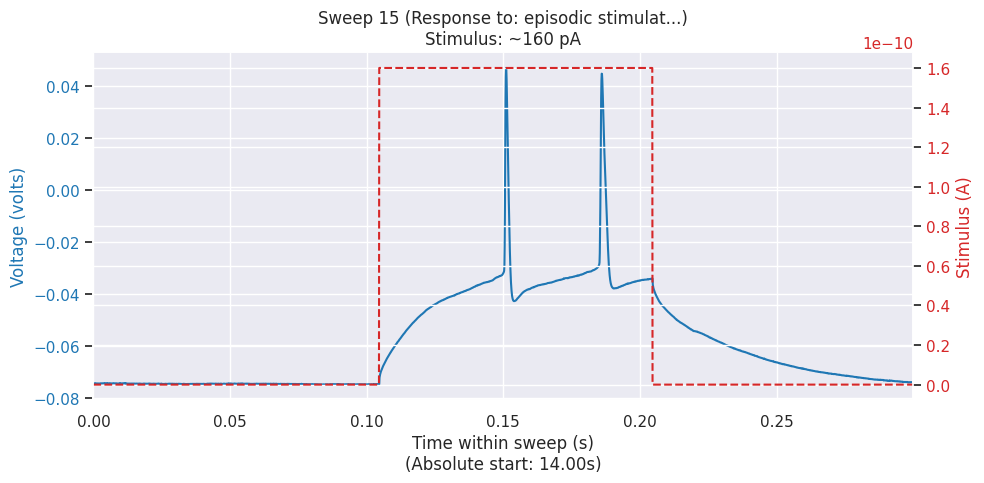

Showing sweep 15:
  Response: current_clamp-response-15-ch-0, Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Stimulus: stimulus-15-ch-0, Description: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  Sweep duration: 0.300 s


In [5]:
# Select the sweep to plot
sweep_num_str = "15" # This sweep showed action potentials in exploration

acquisition = nwbfile.acquisition
stimulus_dict = nwbfile.stimulus

response_series_name = f"current_clamp-response-{sweep_num_str}-ch-0"
stimulus_series_name = f"stimulus-{sweep_num_str}-ch-0"

if response_series_name in acquisition and stimulus_series_name in stimulus_dict:
    response_series = acquisition[response_series_name]
    stimulus_series = stimulus_dict[stimulus_series_name]

    # Get response data
    response_data_raw = response_series.data[:]
    response_conversion = response_series.conversion
    response_data_converted = response_data_raw * response_conversion
    response_rate = response_series.rate
    # Timestamps relative to sweep start
    response_timestamps = (np.arange(len(response_data_converted)) / response_rate)
    response_unit = response_series.unit
    response_abs_start_time = response_series.starting_time

    # Get stimulus data
    stimulus_data_raw = stimulus_series.data[:]
    stimulus_conversion = stimulus_series.conversion
    stimulus_data_converted = stimulus_data_raw * stimulus_conversion
    stimulus_rate = stimulus_series.rate
    # Timestamps relative to sweep start
    stimulus_timestamps = (np.arange(len(stimulus_data_converted)) / stimulus_rate)
    stimulus_unit = stimulus_series.unit
    stimulus_abs_start_time = stimulus_series.starting_time

    stim_val_pA = 0
    if len(np.unique(stimulus_data_raw)) > 1 and stimulus_conversion != 0:
        non_zero_stim = stimulus_data_raw[stimulus_data_raw != 0]
        if len(non_zero_stim) > 0:
            stim_val_pA = np.median(non_zero_stim) * stimulus_conversion * 1e12 # pA

    # Plot
    sns.set_theme()
    fig, ax1 = plt.subplots(figsize=(10, 5))

    color_response = 'tab:blue'
    ax1.set_xlabel(f"Time within sweep (s)\n(Absolute start: {response_abs_start_time:.2f}s)")
    ax1.set_ylabel(f"Voltage ({response_unit})", color=color_response)
    ax1.plot(response_timestamps, response_data_converted, color=color_response)
    ax1.tick_params(axis='y', labelcolor=color_response)
    ax1.set_title(f"Sweep {sweep_num_str} ({response_series.description[:30]}...)\nStimulus: ~{stim_val_pA:.0f} pA")
    ax1.set_xlim(response_timestamps[0], response_timestamps[-1])

    # Add annotation for the first action potential
    # Approximate coordinates from visual inspection of plot_05.png for sweep 15
    # (time relative to sweep start, voltage)
    # First spike around t=0.13s (relative), V ~ 0.04V
    # We need to find the index for t_peak_approx in response_timestamps
    t_peak_approx_relative = 0.13  # Relative time of AP peak chosen for annotation
    v_peak_approx = 0.04   # Approximate voltage of AP peak
    
    # Find the data point closest to t_peak_approx_relative for annotation
    # This is illustrative; more robust peak detection would be needed for automated analysis.
    peak_time_for_annotation = -1
    peak_voltage_for_annotation = -1

    if len(response_timestamps) > 0:
        # Find index of timestamp closest to t_peak_approx_relative
        time_diffs = np.abs(response_timestamps - t_peak_approx_relative)
        idx_closest_to_peak = np.argmin(time_diffs) # index of the closest time
        
        # Get actual time and voltage at this index for annotation
        peak_time_for_annotation = response_timestamps[idx_closest_to_peak]
        peak_voltage_for_annotation = response_data_converted[idx_closest_to_peak]

        # Only annotate if we found a reasonable point and it's somewhat spike-like
        if peak_time_for_annotation > 0.1 and peak_voltage_for_annotation > 0: # Basic check
             ax1.annotate('Action Potential',
                         xy=(peak_time_for_annotation, peak_voltage_for_annotation),
                         xytext=(peak_time_for_annotation + 0.05, peak_voltage_for_annotation + 0.01),
                         arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                         fontsize=9)

    ax2 = ax1.twinx()
    color_stimulus = 'tab:red'
    ax2.set_ylabel(f"Stimulus ({stimulus_unit.replace('amperes', 'A')})", color=color_stimulus) # Shorten unit
    ax2.plot(stimulus_timestamps, stimulus_data_converted, color=color_stimulus, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color_stimulus)

    fig.tight_layout()
    plt.show()

    print(f"Showing sweep {sweep_num_str}:")
    print(f"  Response: {response_series_name}, Description: {response_series.description}")
    print(f"  Stimulus: {stimulus_series_name}, Description: {stimulus_series.description}")
    print(f"  Sweep duration: {len(response_data_converted)/response_rate:.3f} s")

else:
    print(f"Could not find series for sweep {sweep_num_str} in the NWB file.")

### Interpreting the Plot

The plot above shows the voltage response (blue trace) of a neuron to a step of current injection (red dashed trace).

*   The **stimulus** is a positive current step, indicating a depolarizing current was injected into the cell. The title provides an estimate of its amplitude (~160 pA in this case). The stimulus is applied for a portion of the sweep (typically 100ms, from 0.1s to 0.2s in this 0.3s sweep).
*   The **voltage response** shows:
    *   An initial resting membrane potential (around -0.075 V or -75 mV before the stimulus).
    *   Depolarization of the membrane potential during the current injection.
    *   Firing of action potentials (the sharp, rapid upward and downward spikes) when the depolarization reaches the neuron's threshold. In this example, two action potentials are visible.
    *   After the current step ends, the membrane potential repolarizes, returning towards its resting state.

This type of plot is fundamental for characterizing the electrical properties of neurons, such as their firing threshold, firing patterns, and input resistance.

## Summary and Future Directions

This notebook demonstrated how to:
*   Connect to the DANDI Archive and retrieve information about a Dandiset.
*   Load a specific NWB file containing intracellular electrophysiology data from the DANDI Archive.
*   Inspect the contents of the NWB file, particularly `CurrentClampSeries` and `CurrentClampStimulusSeries`.
*   Visualize a single sweep of current clamp data, showing the stimulus and the neuron's voltage response, including action potentials.

### Possible Future Directions for Analysis:

*   **Analyze multiple sweeps:** Iterate through all sweeps of an episodic stimulation protocol to plot a family of responses (e.g., an I-V curve showing voltage deflection vs. current, or an F-I curve showing firing rate vs. current).
*   **Extract spike features:** If action potentials are present, one could implement algorithms to detect spikes and analyze their features (e.g., threshold, amplitude, width, AHP).
*   **Calculate membrane properties:** From subthreshold responses to current steps, passive membrane properties like input resistance and membrane time constant could be estimated.
*   **Compare across conditions/cell types:** If the Dandiset contains data from different experimental conditions or cell types, similar analyses could be applied and compared.
*   **Explore other data types:** This Dandiset also contains calcium imaging and behavioral video data, which could be explored using appropriate tools and methods.

This notebook provides a starting point for researchers to begin their own exploration and analysis of Dandiset 001195.

In [6]:
# Close the HDF5 file and the remfile object when done.
# Note: In a Jupyter notebook, this might ideally be done at the very end
# or if the nwbfile object is no longer needed. For simplicity in هذا المثال,
# we'll do it here. If you plan to run more cells using 'nwbfile',
# you might move this to a final cleanup cell.

if 'io' in locals() and io is not None:
    io.close()
if 'h5_f' in locals() and h5_f is not None:
    h5_f.close()
if 'remote_f' in locals() and remote_f is not None:
    remote_f.close()

print("Closed NWB file resources.")

Closed NWB file resources.
